# Problem Statement:



 - Bank as a financial institution wants lead money to as many people as possible. 
 - Figure out the miminum acceptability thrashold using the data at hand.
 - Similarly Bank do not want to lose moeny by leading to someone who cannot pay back. figure out the way by which deafulters can be identified.
***


### Importing The Necessary Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Reading The Datasets

In [2]:
app_data = pd.read_csv("application_data.csv")
pre_data = pd.read_csv("previous_application.csv")

### Understanding Data Shape and Headers

In [5]:
app_data.shape

(307511, 122)

In [6]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
pre_data.shape

(1670214, 37)

In [8]:
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Data Cleaning
***

### Checking for Missing Values

In [9]:
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

- There are quite a few columns has more than 40% values missing in them. Using such columns for Data Analysis might give us skewed results. It is better to drop these columns.

In [10]:
null_per = app_data.isnull().sum()/app_data.shape[0]*100

In [11]:
col_drop = null_per[null_per>46].keys()

In [12]:
app_data = app_data.drop(col_drop, axis=1)

#### Let's confirm data for relevent columns' unique values
This should be able to help us identify if we have any duplicate or similar value in categorical data.

- Occupation has 31% Missing value. Since the data is categorical. We will just put all the missing values as 'Others'

In [13]:
app_data.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [14]:
app_data.OCCUPATION_TYPE = app_data.OCCUPATION_TYPE.fillna('Others')

- Column 'Name_TYPE_SUITE' has missing value as well as repetative labels. Let's fix those.

In [15]:
app_data.NAME_TYPE_SUITE.unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [16]:
app_data.NAME_TYPE_SUITE = app_data.NAME_TYPE_SUITE.replace({'Other_A': 'Unspecified', 'Other_B': 'Unspecified', 'Spouse, partner' : 'Spouse'}, regex=True)

In [17]:
app_data.NAME_TYPE_SUITE = app_data.NAME_TYPE_SUITE.fillna('Unspecified')


- Column 'CNT_FAM_MEMBERS' has missing value.

The description of label is how many family members client have. We can take avarage and replace the value. as it will be fair to assume that applicant will have family members. Its just that we dont know how many.


In [18]:
app_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [19]:
app_data.CNT_FAM_MEMBERS = app_data.CNT_FAM_MEMBERS.fillna(2.0)

- Let's confirm data for relevent columns unique values.

This should be able to help us identify if we have any duplicate or similar value in categorical data.

In [20]:
app_data.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

Since female population is close to twice as much as male population in our dataset. it is safe to assume  'XNA' category which has 4 entries can be included in female category and it will not have any significant impact on our analysis.

In [21]:
app_data.CODE_GENDER = app_data.CODE_GENDER.replace('XNA', 'F', regex=True) 

Organisation type has too detailed type of organisation. We can combine them in most common type

In [22]:
app_data.ORGANIZATION_TYPE.unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [23]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [24]:
app_data.ORGANIZATION_TYPE = app_data.ORGANIZATION_TYPE.replace( 'XNA', 'Other' ,regex=True)

Converting Negative values to positive


In [25]:
covert_to_years = ['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

app_data[covert_to_years] = app_data[covert_to_years].abs()

In [26]:
app_data['AGE'] = app_data['DAYS_BIRTH'] // 365

In [27]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [28]:
app_data[app_data.DAYS_LAST_PHONE_CHANGE.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
15709      118330       0         Cash loans           M            Y   

      FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
15709               Y             0          126000.0    278613.0   

       AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
15709      25911.0         252000.0   Unaccompanied          Working   

      NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
15709   Incomplete higher            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
15709                    0.010643        8574            293   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
15709             4790.0             1075           0               1   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
15709                0                 1           0           0   

      OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
15709          Others              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
15709                            2                     FRIDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
15709                       13                           0   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
15709                           0                            0   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
15709                       0                       0   

       LIVE_CITY_NOT_WORK_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
15709                        0     Trade: type 3           NaN           NaN   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
15709                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
15709                     NaN                0                0   

       FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
15709                0                0                0                0   

       FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
15709                1                0                 0                 0   

       FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
15709                 0                 0                 0                 0   

       FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
15709                 0                 0                 1                 0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
15709                 0                 0                         NaN   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
15709                        NaN                         NaN   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
15709                        NaN                        NaN   

       AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
15709                         NaN   23

In [29]:
app_data.DAYS_LAST_PHONE_CHANGE.median()

-757.0

In [30]:
app_data.DAYS_LAST_PHONE_CHANGE = app_data.DAYS_LAST_PHONE_CHANGE.fillna(app_data.DAYS_LAST_PHONE_CHANGE.median())

In [31]:
app_data[app_data.EXT_SOURCE_2.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
329         100377       0         Cash loans           M            N   
349         100402       0         Cash loans           F            N   
617         100706       0         Cash loans           F            N   
1028        101189       0         Cash loans           F            Y   
1520        101787       0         Cash loans           M            Y   
2098        102466       0         Cash loans           F            N   
2426        102831       0         Cash loans           F            N   
2448        102855       0         Cash loans           F            Y   
2756        103215       0         Cash loans           F            N   
3212        103750       0         Cash loans           F            N   
3456        104033       0         Cash loans           F            N   
3525        104116       1         Cash loans           F            N   
3812        104454       0         Cash loans           F            N   
4458        105211       0         Cash loans           M            Y   
4562        105334       0         Cash loans           M            N   
4748        105550       0         Cash loans           F            N   
5892        106897       0         Cash loans           M            N   
6138        107173       0         Cash loans           F            N   
6432        107501       0    Revolving loans           F            N   
6992        108143       0         Cash loans           F            N   
7220        108403       0    Revolving loans           F            N   
7402        108629       0         Cash loans           F            N   
7491        108733       1         Cash loans           F            N   
7730        109018       0         Cash loans           F            N   
9117        110599       0         Cash loans           F            N   
9184        110677       0         Cash loans           F            N   
10050       111697       0         Cash loans           M            N   
10881       112662       0         Cash loans           F            N   
10910       112701       0         Cash loans           F            Y   
11400       113271       0         Cash loans           F            N   
11881       113848       0         Cash loans           F            N   
12065       114071       0         Cash loans           M            Y   
12386       114438       0         Cash loans           F            N   
12516       114587       0         Cash loans           F            N   
12825       114949       0         Cash loans           F            N   
12898       115032       0         Cash loans           F            N   
13499       115734       0         Cash loans           F            N   
14314       116698       0         Cash loans           F            Y   
14714       117166       0         Cash loans           F            N   
14869       117356       0         Cash loans           F            N   
15709       118330       0         Cash loans           M            Y   
15795       118434       1         Cash loans           M            Y   
15858       118504       0         Cash loans           M            Y   
16376       119100       0         Cash loans           F            N   
16498       119244       0         Cash loans           F            N   
16505       119254       0         Cash loans           F            N   
17029       119865       0         Cash loans           F            Y   
17436       120336       0         Cash loans           M            Y   
18349       121404       0         Cash loans           F            N   
19661       122929       0         Cash loans           M            Y   
20042       123380       0    Revolving loans           M            Y   
20686       124115       0         Cash loans           F            N   
20843       124290       0         Cash loans           F            N   
20988       

In [32]:
app_data.EXT_SOURCE_2.median()

0.5659614260608526

In [33]:
app_data.EXT_SOURCE_2 = app_data.EXT_SOURCE_2.fillna(app_data.EXT_SOURCE_2.median())

## Let's work on the Previous Application Dataset 
Let's find missing values and fix other things with dataset.
***



In [34]:
pre_data.isnull().sum() * 100/len(pre_data)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

- There are quite a few columns has more than 40% values missing in them. Using such columns for Data Analysis might give us skewed results. It is better to drop these columns.

In [35]:
null_per1 = pre_data.isnull().sum()/pre_data.shape[0]*100

In [36]:
col_drop1 = null_per1[null_per1>40].keys()

In [37]:
pre_data = pre_data.drop(col_drop1, axis=1)

In [38]:
pre_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [39]:
pre_data.PRODUCT_COMBINATION = pre_data.PRODUCT_COMBINATION.fillna('Unspecified')


In [40]:
pre_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [41]:
pre_data[pre_data.NAME_CONTRACT_TYPE == 'XNA']

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6664        2515161      222844                XNA          NaN   
9029        1851920      417884                XNA          NaN   
17038       2389511      148922                XNA          NaN   
24543       2494449      366626                XNA          NaN   
24574       2781877      394843                XNA          NaN   
25030       2785890      154490                XNA          NaN   
39305       2457349      307803                XNA          NaN   
39461       2456391      164367                XNA          NaN   
52461       2447432      426909                XNA          NaN   
61664       2022193      378447                XNA          NaN   
79933       2377334      351258                XNA          NaN   
80232       1470617      244344                XNA          NaN   
81715       1700167      125160                XNA          NaN   
81716       1380195      379439                XNA          NaN   
83438       1777004      285411                XNA          NaN   
84178       2041259      350713                XNA          NaN   
93088       1507440      179845                XNA          NaN   
108822      1906631      116369                XNA          NaN   
110745      1808766      188786                XNA          NaN   
117368      2420029      427664                XNA          NaN   
122153      1796666      220723                XNA          NaN   
128265      1520921      206765                XNA          NaN   
139320      1879353      327642                XNA          NaN   
141381      1304559      298506                XNA          NaN   
145615      2315265      246825                XNA          NaN   
147357      2005558      398907                XNA          NaN   
150224      1037118      252364                XNA          NaN   
152238      1861852      331871                XNA          NaN   
153646      2845046      312474                XNA          NaN   
155171      1843109      233103                XNA          NaN   
168273      1432979      114819                XNA          NaN   
169393      2543973      255797                XNA          NaN   
169822      2795751      379139                XNA          NaN   
170943      2829463      214049                XNA          NaN   
171329      2361387      158777                XNA          NaN   
174636      2311659      168000                XNA          NaN   
175815      1168658      369875                XNA          NaN   
179226      2544424      435377                XNA          NaN   
181429      1610407      287042                XNA          NaN   
186568      2061272      194910                XNA          NaN   
193014      1932947      257459                XNA          NaN   
205845      1545818      422839                XNA          NaN   
206049      1534452      150508                XNA          NaN   
220988      1525316      228674                XNA          NaN   
228860      2420647      132307                XNA          NaN   
238742      1353979      176203                XNA          NaN   
239872      1997596      390845                XNA          NaN   
242081      1353720      203268                XNA          NaN   
248395      1091435      265540                XNA          NaN   
264807      1930127      122123                XNA          NaN   
271559      1325455      154424                XNA          NaN   
280708      2752433      221085                XNA          NaN   
287634      2781359      197877                XNA          NaN   
287760      1704265      270372                XNA          NaN   
298955      2117768      274640                XNA          NaN   
308819      2531676      268072                XNA          NaN   
309636      1228335      118358                XNA          NaN   
317522      1860367      184623                XNA          NaN   
325429      1097267      374946                XNA      

## Rest of the Missing Values
Not all the Missing values needs to be treated. Most of the missing values are small enough in percentage. There are few colums which have higher missing values. around 13%-22%, We can simply ignore the missing values while doing the calculation. since we simply do not know these values and guessing them could cause more harm to prediction. 
***

## Data Sanity Check


In [42]:
app_data[(app_data.AMT_ANNUITY > app_data.AMT_INCOME_TOTAL)]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
678         100784       1         Cash loans           F            N   
20727       124157       1         Cash loans           F            Y   
25802       129999       0         Cash loans           F            N   
35791       141454       0         Cash loans           F            Y   
49185       156942       0         Cash loans           F            Y   
58379       167672       0         Cash loans           F            Y   
64338       174612       0         Cash loans           F            N   
68803       179800       0         Cash loans           F            N   
95599       210988       0         Cash loans           M            Y   
112431      230424       0         Cash loans           F            N   
115872      234376       0         Cash loans           F            N   
120680      239922       0         Cash loans           F            N   
122480      242003       1         Cash loans           F            N   
124607      244509       0         Cash loans           F            N   
145088      268238       0         Cash loans           F            Y   
158077      283247       0         Cash loans           F            N   
166480      293005       0         Cash loans           F            N   
168253      295032       0         Cash loans           F            N   
173139      300643       0         Cash loans           F            N   
173546      301115       0         Cash loans           F            Y   
197677      329192       0         Cash loans           F            N   
200894      332872       0         Cash loans           F            N   
205575      338291       1         Cash loans           F            N   
212460      346212       0         Cash loans           F            Y   
212875      346685       0         Cash loans           F            Y   
226137      361920       1         Cash loans           F            N   
228229      364354       0         Cash loans           F            N   
228775      364989       0         Cash loans           F            N   
247615      386520       0         Cash loans           F            Y   
257550      398036       0         Cash loans           F            Y   
264706      406539       0         Cash loans           F            N   
266975      409321       0         Cash loans           F            N   
293599      440148       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
678                  Y             0           54000.0   1885500.0   
20727                Y             0           25650.0   2173500.0   
25802                Y             0           46044.0   1024740.0   
35791                Y             0           45000.0   2215224.0   
49185                Y             0           33750.0    835380.0   
58379                N             0           54000.0   1724688.0   
64338                Y             0           54000.0   1574532.0   
68803                Y             0           31500.0    755190.0   
95599                Y             0           76500.0   2013840.0   
112431               Y             0           40500.0    472500.0   
115872               N             0           67500.0    765000.0   
120680               Y             1           56250.0    790830.0   
122480               N             0           54000.0    497520.0   
124607               Y             0           54000.0   1312110.0   
145088               Y             0           49500.0   1024740.0   
158077               Y             0           40500.0   1436850.0   
166480               Y             0           29250.0    755190.0   
168253               Y             0           67500.0   2085120.0   
173139               N             0           67500.0    706410.0   
173546               N             0           27000.0    760225.5   
197677               

In [43]:
app_data[(app_data.AMT_ANNUITY > app_data.AMT_INCOME_TOTAL)].shape

(33, 74)

- These 33 people have total Income less than their loan annuity. these people cannot afford to pay back.
- Let's drop these recoreds


In [44]:
app_data.drop(app_data[app_data.AMT_ANNUITY > app_data.AMT_INCOME_TOTAL].index, inplace = True)

In [45]:
app_data[(app_data.NAME_FAMILY_STATUS == 'Single / not married') & (app_data.CNT_CHILDREN > 0)].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
19       100023       0         Cash loans           F            N   
87       100102       0         Cash loans           F            N   
172      100201       0         Cash loans           F            N   
255      100295       1         Cash loans           M            Y   
308      100354       0    Revolving loans           F            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
19                Y             1           90000.0    544491.0      17563.5   
87                N             1          126000.0    327024.0      10264.5   
172               Y             1          180000.0    675000.0      36747.0   
255               N             1          225000.0   1019205.0      31032.0   
308               Y             1          112500.0    135000.0       6750.0   

     AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
19          454500.0   Unaccompanied         State servant   
87          270000.0   Unaccompanied               Working   
172         675000.0   Unaccompanied  Commercial associate   
255         774000.0   Unaccompanied  Commercial associate   
308         135000.0   Unaccompanied  Commercial associate   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
19                Higher education  Single / not married  House / apartment   
87   Secondary / secondary special  Single / not married  House / apartment   
172               Higher education  Single / not married  House / apartment   
255  Secondary / secondary special  Single / not married  House / apartment   
308  Secondary / secondary special  Single / not married  House / apartment   

     REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
19                     0.015221       11348           2038             1021.0   
87                     0.024610       14321            192             6913.0   
172                    0.035792       12147           2178             6189.0   
255                    0.072508       11356            602              335.0   
308                    0.018209        9259           2382             3948.0   

     DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
19              3964           1               1                1   
87              5942           1               1                0   
172             1719           1               1                0   
255             3224           1               1                0   
308             1918           1               1                1   

     FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
19                  1           1           0      Core staff   
87                  1           1           0        Laborers   
172                 1           0           0      Core staff   
255                 1           0           0        Laborers   
308                 1           1           0     Sales staff   

     CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
19               2.0                     2                            2   
87               2.0                     2                            2   
172              2.0                     2                            2   
255              2.0                     1                            1   
308              2.0                     3                            3   

    WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
19                      MONDAY                       12   
87                      SUNDAY                       13   
172                   SATURDAY                       10   
255                     MONDAY                       14   
308                   THURSDAY                       11   

     REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
19                            0                           0   
87                      

In [46]:
app_data[(app_data.NAME_FAMILY_STATUS == 'Single / not married') & (app_data.CNT_CHILDREN > 0)].shape

(6634, 74)

In [47]:
app_data.NAME_FAMILY_STATUS.value_counts()

Married                 196401
Single / not married     45444
Civil marriage           29773
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

There are 6634 people who are Single/Not Married and have children.
It is possible that out of 45444 people who are single, 6634 are divorced and now counted as single/Not Married.

In [48]:
app_data[(app_data.NAME_CONTRACT_TYPE == 'Cash loans') & (app_data.AMT_CREDIT > app_data.AMT_GOODS_PRICE)].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
3      100006       0         Cash loans           F            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
3               Y             0          135000.0    312682.5      29686.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied               Working   
1        1129500.0          Family         State servant   
3         297000.0   Unaccompanied               Working   
5         454500.0          Spouse         State servant   
6        1395000.0   Unaccompanied  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
3                    0.008019       19005           3039             9833.0   
5                    0.035792       16941           1588             4970.0   
6                    0.035792       13778           3130             1213.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
3             2437           1               1                0   
5              477           1               1                1   
6              619           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
3                 1           0           0        Laborers              2.0   
5                 1           1           0        Laborers              2.0   
6                 1           1           0     Accountants              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
3                     2                            2   
5                     2                            2   
6                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
3                  WEDNESDAY                       17   
5                  WEDNESDAY                       16   
6                     SUNDAY                       16   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
3                           0                           0   
5           

In [49]:
app_data[(app_data.AMT_CREDIT > app_data.AMT_GOODS_PRICE) & (app_data.NAME_CONTRACT_TYPE == 'Cash loans')].shape

(198669, 74)

#### Handling Outliers in INCOME

In [50]:
app_data.AMT_INCOME_TOTAL.quantile([0.99,0.95,0.75,0.50,0.25,0.05,0.01])

0.99    472500.0
0.95    337500.0
0.75    202500.0
0.50    147600.0
0.25    112500.0
0.05     67500.0
0.01     45000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [51]:
app_data['INCOME_NORMAL'] = app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL < 337500.0]

In [52]:
app_data['INCOME_HIGH'] = app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL > 337500.0]

Another strange finding is that consumer goods loan is rarely given in full amound of the item. Whereas here we can see there are 198695 entries are when loan amount is much bigger than the goods price. This loan amount needs to readjusted as per goods loan ratio while giving the loan.

In [53]:
pre_data[pre_data.NAME_CONTRACT_TYPE == 'XNA']


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6664        2515161      222844                XNA          NaN   
9029        1851920      417884                XNA          NaN   
17038       2389511      148922                XNA          NaN   
24543       2494449      366626                XNA          NaN   
24574       2781877      394843                XNA          NaN   
25030       2785890      154490                XNA          NaN   
39305       2457349      307803                XNA          NaN   
39461       2456391      164367                XNA          NaN   
52461       2447432      426909                XNA          NaN   
61664       2022193      378447                XNA          NaN   
79933       2377334      351258                XNA          NaN   
80232       1470617      244344                XNA          NaN   
81715       1700167      125160                XNA          NaN   
81716       1380195      379439                XNA          NaN   
83438       1777004      285411                XNA          NaN   
84178       2041259      350713                XNA          NaN   
93088       1507440      179845                XNA          NaN   
108822      1906631      116369                XNA          NaN   
110745      1808766      188786                XNA          NaN   
117368      2420029      427664                XNA          NaN   
122153      1796666      220723                XNA          NaN   
128265      1520921      206765                XNA          NaN   
139320      1879353      327642                XNA          NaN   
141381      1304559      298506                XNA          NaN   
145615      2315265      246825                XNA          NaN   
147357      2005558      398907                XNA          NaN   
150224      1037118      252364                XNA          NaN   
152238      1861852      331871                XNA          NaN   
153646      2845046      312474                XNA          NaN   
155171      1843109      233103                XNA          NaN   
168273      1432979      114819                XNA          NaN   
169393      2543973      255797                XNA          NaN   
169822      2795751      379139                XNA          NaN   
170943      2829463      214049                XNA          NaN   
171329      2361387      158777                XNA          NaN   
174636      2311659      168000                XNA          NaN   
175815      1168658      369875                XNA          NaN   
179226      2544424      435377                XNA          NaN   
181429      1610407      287042                XNA          NaN   
186568      2061272      194910                XNA          NaN   
193014      1932947      257459                XNA          NaN   
205845      1545818      422839                XNA          NaN   
206049      1534452      150508                XNA          NaN   
220988      1525316      228674                XNA          NaN   
228860      2420647      132307                XNA          NaN   
238742      1353979      176203                XNA          NaN   
239872      1997596      390845                XNA          NaN   
242081      1353720      203268                XNA          NaN   
248395      1091435      265540                XNA          NaN   
264807      1930127      122123                XNA          NaN   
271559      1325455      154424                XNA          NaN   
280708      2752433      221085                XNA          NaN   
287634      2781359      197877                XNA          NaN   
287760      1704265      270372                XNA          NaN   
298955      2117768      274640                XNA          NaN   
308819      2531676      268072                XNA          NaN   
309636      1228335      118358                XNA          NaN   
317522      1860367      184623                XNA          NaN   
325429      1097267      374946                XNA      

In [54]:
pre_data.DAYS_DECISION = abs(pre_data.DAYS_DECISION)

In [55]:
pre_data[pre_data.NAME_CONTRACT_TYPE == 'XNA'].shape

(346, 26)

interestingly, Where contract type is 'XNA' majority of these people are from 'Connectivity' industry and this data seems not much use to use. it is better to drop these records


In [56]:
pre_data.drop(pre_data[pre_data.NAME_CONTRACT_TYPE == 'XNA'].index, inplace = True)

In [57]:
pre_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest'], dtype=object)

In [58]:
pre_data.NAME_CASH_LOAN_PURPOSE.value_counts(normalize = True)*100

XAP                                 55.232809
XNA                                 40.597101
Repairs                              1.423166
Other                                0.934685
Urgent needs                         0.503752
Buying a used car                    0.172948
Building a house or an annex         0.161270
Everyday expenses                    0.144682
Medicine                             0.130190
Payments on other loans              0.115638
Education                            0.094199
Journey                              0.074197
Purchase of electronic equipment     0.063538
Buying a new car                     0.060604
Wedding / gift / holiday             0.057609
Buying a home                        0.051801
Car repairs                          0.047728
Furniture                            0.044854
Buying a holiday home / land         0.031919
Business development                 0.025511
Gasification / water supply          0.017965
Buying a garage                   

In [59]:
pre_data.NAME_CASH_LOAN_PURPOSE = pre_data.NAME_CASH_LOAN_PURPOSE.replace({'XAP': 'Others', 'XNA': 'Others'},regex=True) 

## Data Visualization

In [60]:
irregular_payer = app_data[app_data.TARGET == 1] #This is to study defaulters patterns.

In [61]:
regular_payer = app_data[app_data.TARGET == 0] #This is to study regular payer patterns.

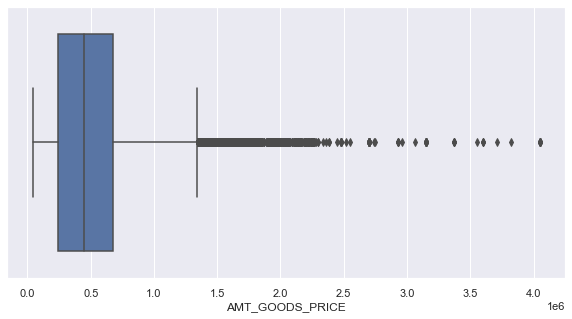

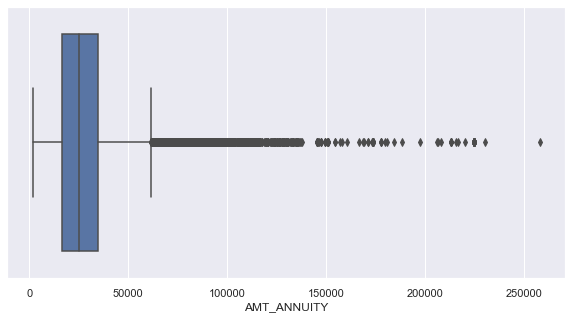

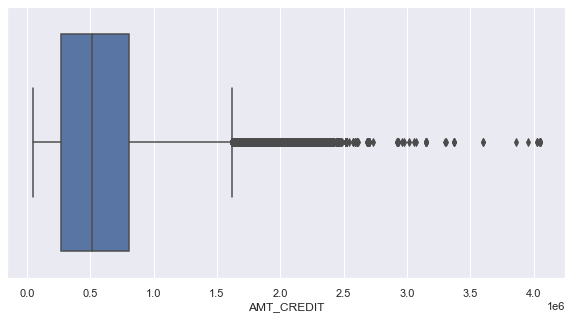

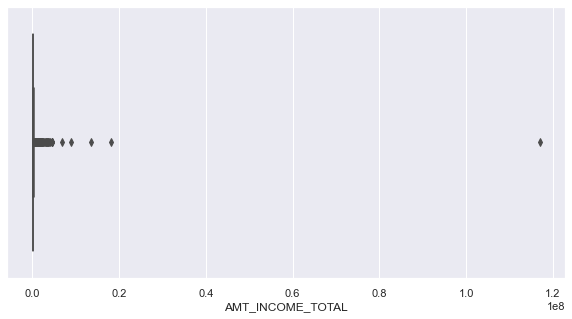

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(app_data['AMT_GOODS_PRICE'])
plt.show()


sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(app_data['AMT_ANNUITY'])
plt.show()

sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(app_data['AMT_CREDIT'])
plt.show()


sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

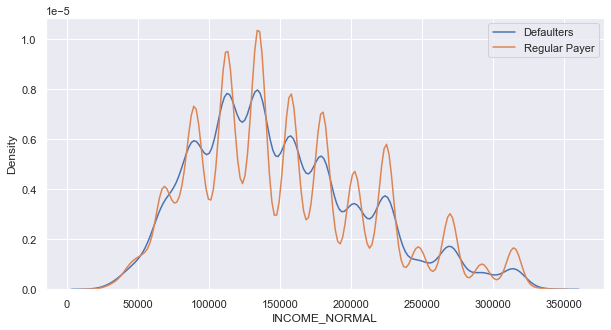

In [63]:
sns.distplot(irregular_payer['INCOME_NORMAL'],label='Defaulters',hist=False)
sns.distplot(regular_payer['INCOME_NORMAL'],label='Regular Payer',hist=False)
plt.legend()
plt.show()

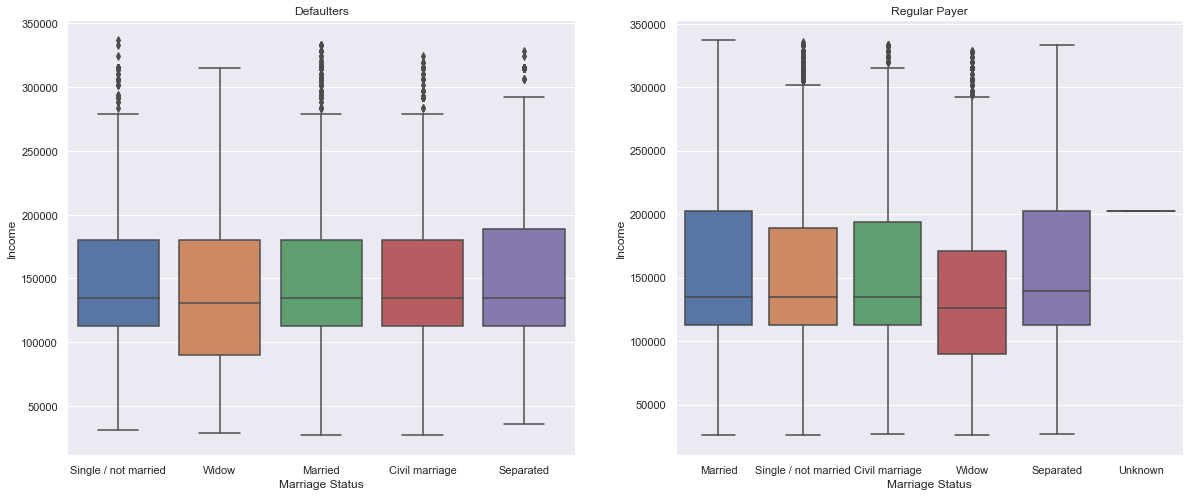

In [64]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Defaulters')

sns.boxplot(x='NAME_FAMILY_STATUS',y='INCOME_NORMAL',data=irregular_payer)
plt.xlabel("Marriage Status")
plt.ylabel("Income")

plt.subplot(1,2,2)
plt.title('Regular Payer')
sns.boxplot(x='NAME_FAMILY_STATUS',y='INCOME_NORMAL',data=regular_payer)
plt.xlabel("Marriage Status")
plt.ylabel("Income")

plt.show()



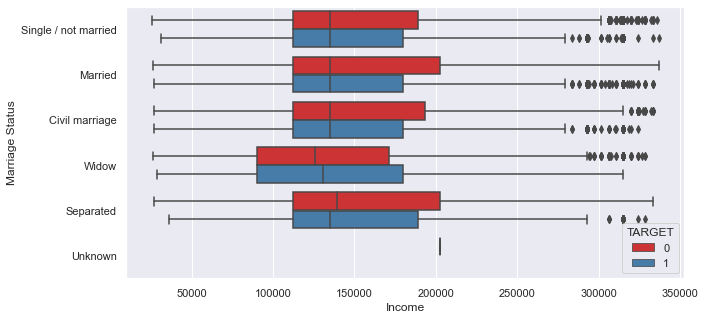

In [65]:
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(x="INCOME_NORMAL", y="NAME_FAMILY_STATUS", hue="TARGET", data = app_data, palette="Set1")
plt.xlabel("Income")
plt.ylabel("Marriage Status")
plt.show()

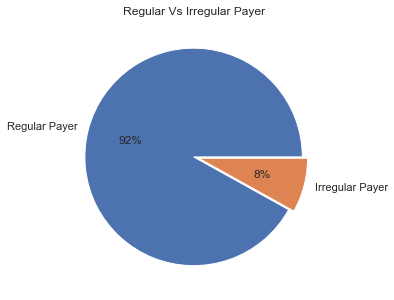

In [66]:
plt.pie(app_data.TARGET.value_counts(normalize=True)*100,labels=['Regular Payer','Irregular Payer'],explode=(0,0.05),autopct='%1.f%%')
plt.title('Regular Vs Irregular Payer')
plt.show()

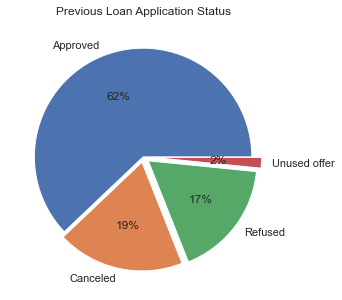

In [67]:
plt.pie(pre_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100,labels=['Approved','Canceled','Refused', 'Unused offer'],explode=(0,0.05,0.06,0.09),autopct='%1.f%%')
plt.title('Previous Loan Application Status')
plt.show()

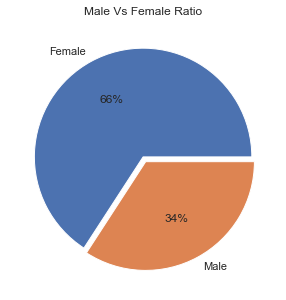

In [68]:
plt.pie(app_data.CODE_GENDER.value_counts(normalize=True)*100,labels=['Female','Male'],explode=(0,0.05),autopct='%1.f%%')
plt.title('Male Vs Female Ratio')
plt.show()

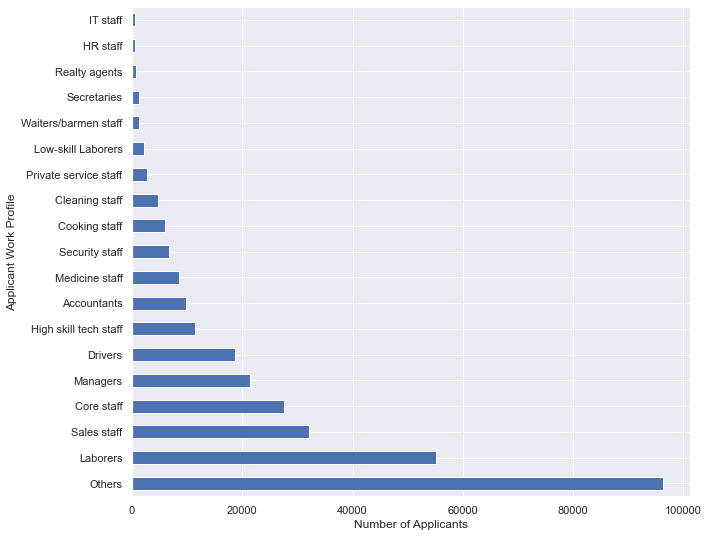

In [69]:
plt.figure(figsize=[10,9])
(app_data.OCCUPATION_TYPE.value_counts()).plot.barh()
plt.xlabel("Number of Applicants")
plt.ylabel("Applicant Work Profile")
plt.show()

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

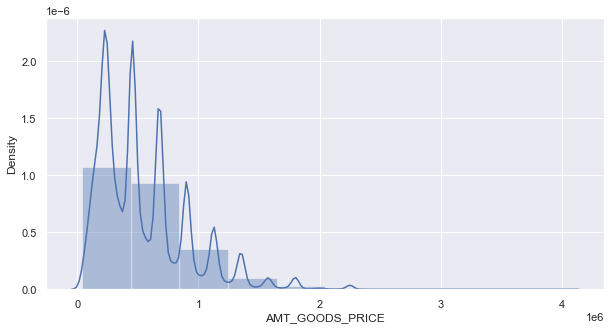

In [70]:
sns.distplot(app_data.AMT_GOODS_PRICE, bins = 10 )

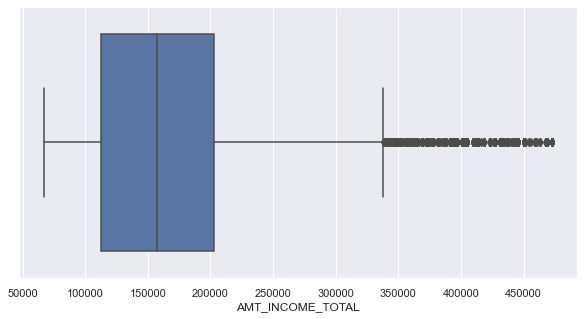

In [71]:
income = app_data.AMT_INCOME_TOTAL[app_data.AMT_INCOME_TOTAL.between(app_data.AMT_INCOME_TOTAL.quantile(.05), app_data.AMT_INCOME_TOTAL.quantile(.99))]
sns.boxplot(income)
plt.show()

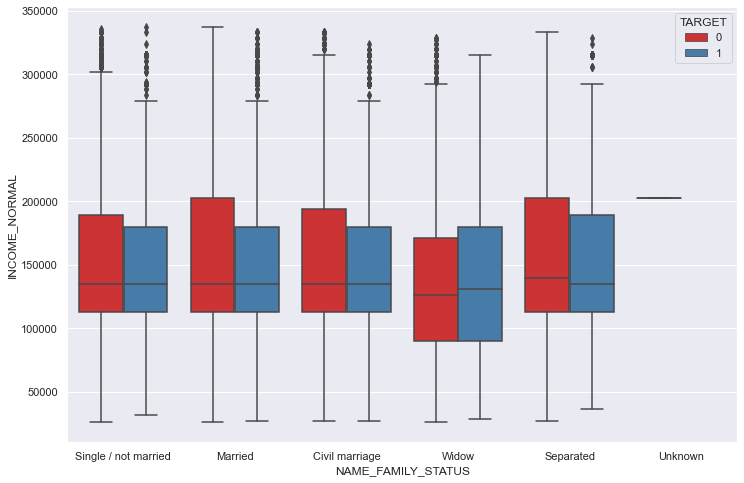

In [72]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="NAME_FAMILY_STATUS", y="INCOME_NORMAL", hue="TARGET", data = app_data, palette="Set1")
plt.show()

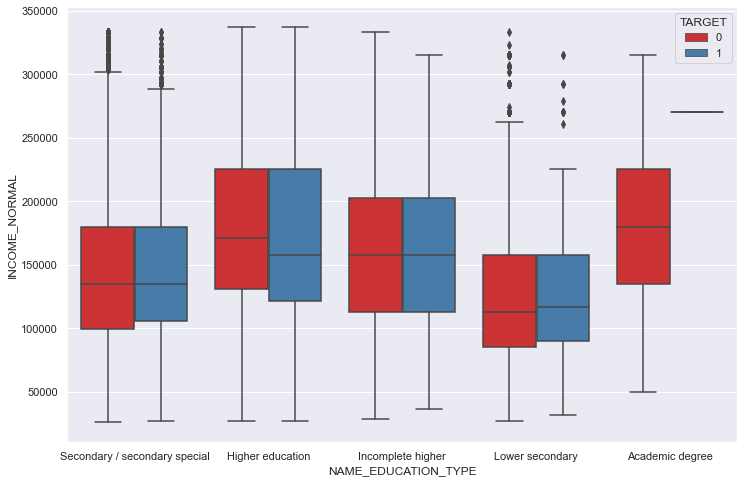

In [73]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="NAME_EDUCATION_TYPE", y="INCOME_NORMAL", hue="TARGET", data = app_data, palette="Set1")
plt.show()

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='INCOME_HIGH'>

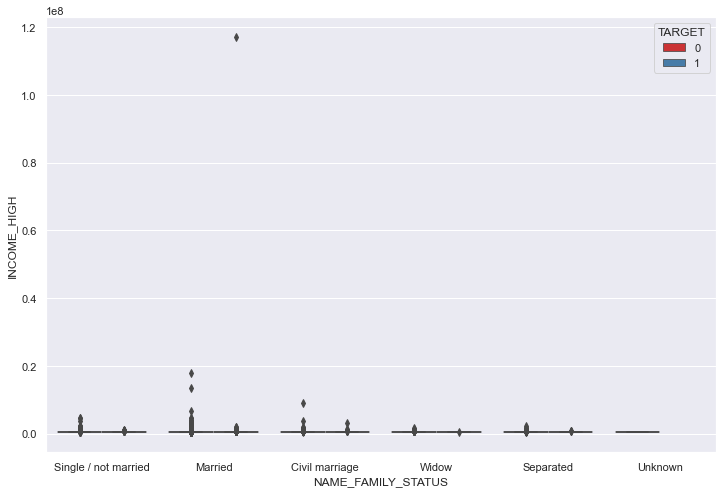

In [74]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x="NAME_FAMILY_STATUS", y="INCOME_HIGH", hue="TARGET", data = app_data, palette="Set1")


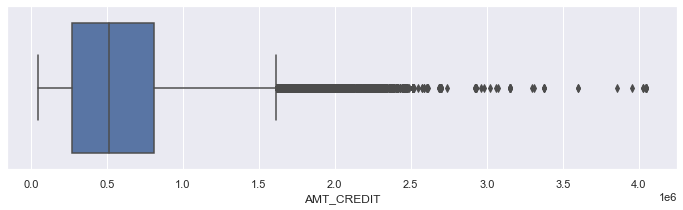

In [75]:
sns.set(rc={'figure.figsize':(12,3)})
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

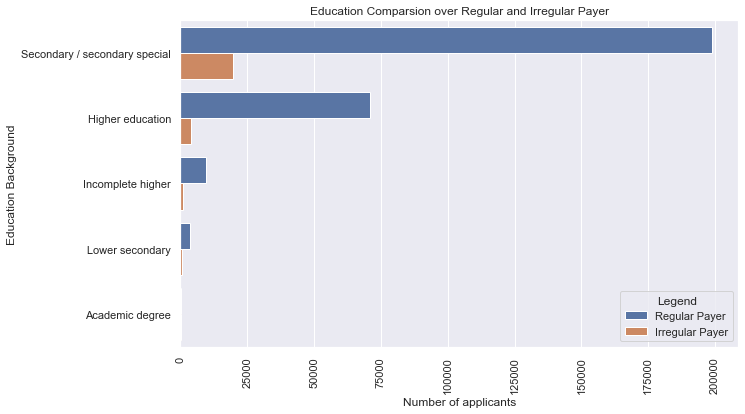

In [76]:
sns.color_palette("mako", as_cmap=True)
plt.figure(figsize=(10,6))

plt.title('Education Comparsion over Regular and Irregular Payer')

sns.countplot(y = 'NAME_EDUCATION_TYPE',data = app_data,hue = 'TARGET')


plt.xlabel('Number of applicants')
plt.ylabel('Education Background')

plt.legend(title='Legend', loc='lower right', labels=['Regular Payer', 'Irregular Payer'])
plt.xticks(rotation=90)

plt.show()

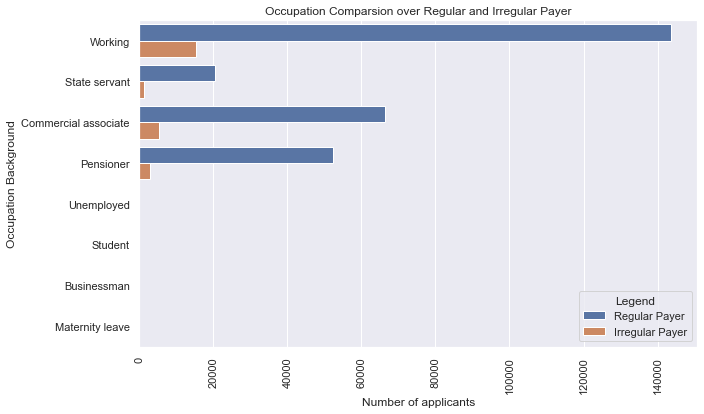

In [77]:
sns.color_palette("rocket", as_cmap=True)


plt.figure(figsize=(10,6))

plt.title('Occupation Comparsion over Regular and Irregular Payer')

sns.countplot(y = 'NAME_INCOME_TYPE',data = app_data,hue = 'TARGET')


plt.xlabel('Number of applicants')
plt.ylabel('Occupation Background')

plt.legend(title='Legend', loc='lower right', labels=['Regular Payer', 'Irregular Payer'])
plt.xticks(rotation=90)

plt.show()

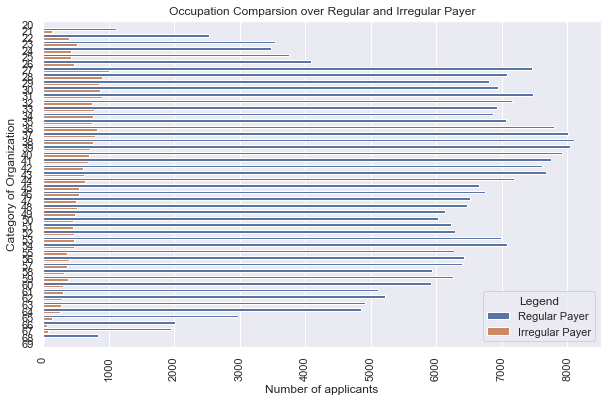

In [78]:
sns.color_palette("rocket", as_cmap=True)


plt.figure(figsize=(10,6))

plt.title('Occupation Comparsion over Regular and Irregular Payer')

sns.countplot(y = 'AGE',data = app_data,hue = 'TARGET')


plt.xlabel('Number of applicants')
plt.ylabel('Category of Organization')

plt.legend(title='Legend', loc='lower right', labels=['Regular Payer', 'Irregular Payer'])
plt.xticks(rotation=90)

plt.show()

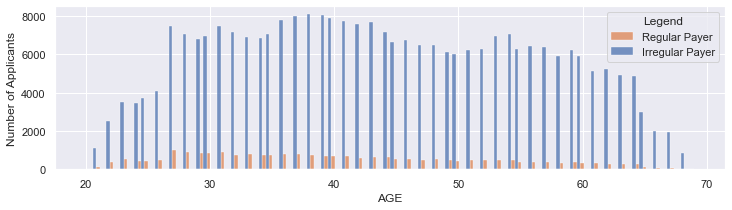

In [79]:
sns.histplot(data=app_data, x="AGE", hue="TARGET", multiple="dodge", shrink=1)


plt.ylabel('Number of Applicants')

plt.legend(title='Legend', labels=['Regular Payer', 'Irregular Payer'])

plt.show()

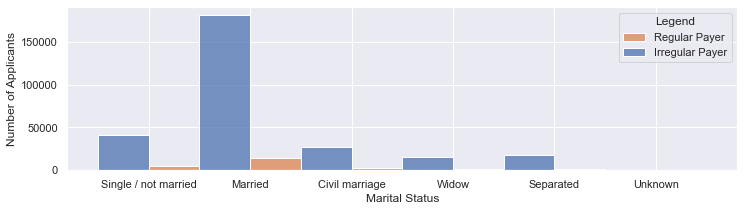

In [80]:

sns.histplot(data=app_data, x="NAME_FAMILY_STATUS", hue="TARGET", multiple="dodge", shrink=1)

plt.xlabel('Marital Status')
plt.ylabel('Number of Applicants')

plt.legend(title='Legend', labels=['Regular Payer', 'Irregular Payer'])

plt.show()

# END OF THE CASE STUDY